In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [19]:
using DataFrames, TimeSeries, XLSX, StatsBase, CSV, LinearAlgebra, Distributions, Plots

In [3]:
using Revise

includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_gibs.jl")
includet("../src/ESGModels/msvar_simulate.jl") 

In [4]:
using FinancialPlanner.ESGModels

In [5]:
data_source = TimeArray(CSV.File("../data/usa_var_data.csv"; delim=';', decimal=',',types =[DateTime, Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64], dateformat="dd.mm.yyyy"), timestamp=:Date)
data_source = collapse(data_source, Dates.quarter, last)

292×11 TimeArray{Float64, 2, DateTime, Matrix{Float64}} 1951-12-01T00:00:00 to 2024-07-01T00:00:00
┌─────────────────────┬──────────┬───────────┬─────────────┬──────────┬─────────
│                     │ Yeld_10Y │ Price_10Y │ Stock_Price │ Dividend │ E      ⋯
├─────────────────────┼──────────┼───────────┼─────────────┼──────────┼─────────
│ 1951-12-01T00:00:00 │     0.03 │     104.1 │       24.19 │     1.41 │   2.44 ⋯
│ 1952-03-01T00:00:00 │     0.03 │    104.82 │       23.74 │     1.43 │    2.4 ⋯
│ 1952-06-01T00:00:00 │     0.02 │    106.29 │       25.08 │     1.45 │   2.34 ⋯
│ 1952-09-01T00:00:00 │     0.03 │    104.47 │       24.26 │     1.44 │   2.36 ⋯
│ 1952-12-01T00:00:00 │     0.03 │     106.4 │       26.18 │     1.41 │    2.4 ⋯
│ 1953-03-01T00:00:00 │     0.03 │    105.37 │       24.71 │     1.41 │   2.43 ⋯
│ 1953-06-01T00:00:00 │     0.03 │    103.86 │       24.29 │     1.42 │   2.51 ⋯
│ 1953-09-01T00:00:00 │     0.03 │    107.81 │       23.97 │     1.43 │   2.55 ⋯
│         

In [6]:
colnames(data_source)

11-element Vector{Symbol}:
 :Yeld_10Y
 :Price_10Y
 :Stock_Price
 :Dividend
 :E
 :CAPE
 :T_Bill
 :CPI
 :Dividend_Yeld
 :Total_Stock_2
 :Total_Stock

In [7]:
freq = 4
#:Price_10Y
returns = percentchange(data_source[:Total_Stock], :log)
#returns = merge(returns, log1p.(data_source[:T_Bill])./freq)
cpi = percentchange(data_source[:CPI], :log)
real_t_bill = log1p.(data_source[:T_Bill])./freq .- cpi
excess_returns = returns .- log1p.(data_source[:T_Bill]./freq)
term = data_source[:Yeld_10Y] ./freq .- data_source[:T_Bill] ./freq
dy = log.(data_source[:Dividend_Yeld])
data = merge(excess_returns, real_t_bill, term, cpi, dy)

291×5 TimeArray{Float64, 2, DateTime, Matrix{Float64}} 1952-03-01T00:00:00 to 2024-07-01T00:00:00
┌─────────────────────┬────────────────────┬─────────────┬─────────────────┬────
│                     │ Total_Stock_T_Bill │ T_Bill_CPI  │ Yeld_10Y_T_Bill │ C ⋯
├─────────────────────┼────────────────────┼─────────────┼─────────────────┼────
│ 1952-03-01T00:00:00 │        -0.00874459 │  0.00873138 │          0.0025 │ - ⋯
│ 1952-06-01T00:00:00 │          0.0644792 │  -0.0063489 │             0.0 │   ⋯
│ 1952-09-01T00:00:00 │         -0.0234957 │  0.00495066 │          0.0025 │   ⋯
│ 1952-12-01T00:00:00 │            0.08467 │  0.00870301 │          0.0025 │ - ⋯
│ 1953-03-01T00:00:00 │         -0.0488119 │  0.00495066 │          0.0025 │   ⋯
│ 1953-06-01T00:00:00 │        -0.00764863 │ -0.00254001 │          0.0025 │   ⋯
│ 1953-09-01T00:00:00 │        -0.00308604 │ -0.00248432 │          0.0025 │   ⋯
│ 1953-12-01T00:00:00 │          0.0693104 │  0.00866124 │             0.0 │ - ⋯
│          

In [8]:
colnames(data)

5-element Vector{Symbol}:
 :Total_Stock_T_Bill
 :T_Bill_CPI
 :Yeld_10Y_T_Bill
 :CPI
 :Dividend_Yeld

In [9]:
start = Date(1999,01,01)
end_d = Date(2019, 12, 31)
#s_data = to(from(data, start),end_d)
from(data, Date(1999,01,01))


MethodError: MethodError: no method matching from(::TimeArray{Float64, 2, DateTime, Matrix{Float64}}, ::Date)
The function `from` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  from(::TimeArray{T, N, D, A} where A<:AbstractArray{T, N}, !Matched::D) where {T, N, D}
   @ TimeSeries C:\Users\matsz\.julia\packages\TimeSeries\zx7sJ\src\split.jl:10


In [10]:
ta = TimeArray([Date(2020,01,01), Date(2021,01,01), Date(2022,01,01)], [1 2 ;3 4; 5 6], ["one", "two"])
from(ta, Date(2022,01,01))

1×2 TimeArray{Int64, 2, Date, Matrix{Int64}} 2022-01-01 to 2022-01-01
┌────────────┬─────┬─────┐
│            │ one │ two │
├────────────┼─────┼─────┤
│ 2022-01-01 │   5 │   6 │
└────────────┴─────┴─────┘

In [32]:
Y = collect(values(data)[2:end,:])
T = length(data) -1 
p = 1
X = hcat(ones(T), values(data)[p:end-1,:])
k= 2 #n_regimes
n_variables = 2


2

In [35]:
n_burn = 20_000
n_sample = 2000
n = 2
Β0 = (inv(transpose(X) * X) * transpose(X) * Y)
Σ0 = transpose((Y -  X * Β0)) * (Y -  X * Β0) / (T- n -1)

tm0 = [.9 .1; .1 .9]

regimes, t_m, Β_post, Σ_post = msvar(Y, X, transition_matrix, [Β0', Β0'], [Σ0, Σ0], n_burn, n_sample)

([2 2 … 2 2; 2 2 … 2 2; … ; 2 2 … 2 2; 2 2 … 2 2], [0.11428420963660506 0.09123549607510399; 0.24168104231797108 0.09125925955000552; … ; 0.15537573552242903 0.15025241631536274; 0.0697654493798378 0.13284744447904706;;; 0.8857157903633951 0.908764503924896; 0.7583189576820288 0.9087407404499944; … ; 0.8446242644775709 0.8497475836846372; 0.9302345506201621 0.8671525555209528], Vector{Any}[[[0.4993440871406475 0.003314315583202193 … -5.015879651295789 0.11499368916897384; -0.007932254400231303 -0.05475244175846508 … 0.3195840394639113 -0.0012671193526539865; … ; 0.009807113124295618 0.059447807176222035 … 0.5740749142741968 0.0015235425086833534; -1.4276184381849295 0.7111687786039608 … 16.847713346125833 0.6858707980669642], [0.013129516310740975 0.0855893888291704 … -1.699639921601589 -0.002828738778300628; -0.007725966058849888 0.0016981943574861762 … 0.49721000052880915 -0.0007971122490708491; … ; 0.008736785069254217 0.004018536037314977 … 0.5460150196391174 0.0012795159449210149;

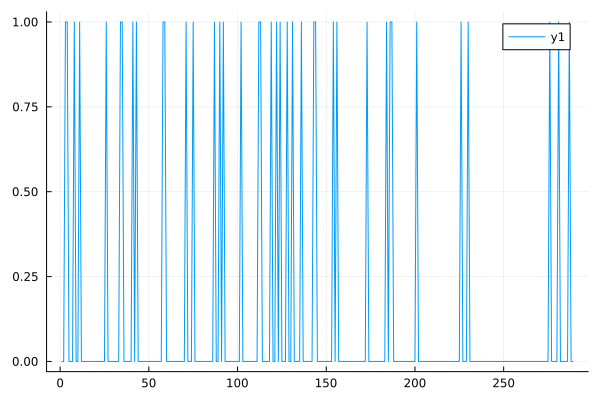

In [36]:
r1 = [count(x -> x ==1, regimes[:,t]) for t in 1:T-1] / n_sample

plot(r1)


In [37]:
display("transition matrix")
display(mean(t_m, dims=1)[1,:,:])

display(colnames(data))

display("coefficients")
display("regime one")
display(mean(map(x -> x[1],Β_post)))
display("regime two")
display(mean(map(x -> x[2],Β_post)))


cov1_mean = mean(map(x -> x[1], Σ_post))
cov2_mean = mean(map(x -> x[2], Σ_post))

display("standard deviations")
display("regime one")
display(sqrt.(diag(cov1_mean)))
display("regime two")
display(sqrt.(diag(cov2_mean)))


display("correlations")
display("regime one")
display(cov2cor(cov1_mean))
display("regime two")
display(cov2cor(cov2_mean))


"transition matrix"

2×2 Matrix{Float64}:
 0.153781  0.846219
 0.131758  0.868242

5-element Vector{Symbol}:
 :Total_Stock_T_Bill
 :T_Bill_CPI
 :Yeld_10Y_T_Bill
 :CPI
 :Dividend_Yeld

"coefficients"

"regime one"

5×6 Matrix{Float64}:
  0.405044     0.125047     0.188379   -4.14238   -3.3408     0.100972
  0.00451588  -0.0141747    0.637852    0.867107   0.11866    0.00152392
  0.00492957  -0.000130126  0.0696204   0.732787   0.128742   0.0013728
 -0.00774612   0.0194224    0.206262   -0.793029   0.680206  -0.0028234
 -1.07441     -0.109853     0.0539538  20.1088    13.9357     0.75945

"regime two"

5×6 Matrix{Float64}:
  0.059548      0.0915878    -1.14307      …  -1.79693       0.00941919
 -0.00556216   -0.00470933    0.627247         0.377179     -0.000616987
  0.000918961  -0.000487403  -0.0276144       -0.0484153    -6.12831e-5
  0.00637284    0.00901119    0.363767         0.667017      0.000999359
 -4.98142e-13  -2.60753e-14   4.26658e-12      4.71383e-12   1.0

"standard deviations"

"regime one"

5-element Vector{Float64}:
 0.1341941403636893
 0.009616693036881063
 0.0032793171958874503
 0.010699860437797266
 0.4149044564552708

"regime two"

5-element Vector{Float64}:
 0.05591578793868553
 0.007010496424862664
 0.001990663779850638
 0.00711294869250819
 4.837587187946644e-14

"correlations"

"regime one"

5×5 Matrix{Float64}:
  1.0        0.033498     0.248683  -0.177464  -0.834552
  0.033498   1.0         -0.200031  -0.924678  -0.00911335
  0.248683  -0.200031     1.0       -0.103973  -0.196613
 -0.177464  -0.924678    -0.103973   1.0        0.103156
 -0.834552  -0.00911335  -0.196613   0.103156   1.0

"regime two"

5×5 Matrix{Float64}:
  1.0          0.023403    -0.0750783    -0.0403624    0.00517856
  0.023403     1.0         -0.137808     -0.968594    -0.00142314
 -0.0750783   -0.137808     1.0          -0.0224208   -0.000218712
 -0.0403624   -0.968594    -0.0224208     1.0          0.00152994
  0.00517856  -0.00142314  -0.000218712   0.00152994   1.0